# Sentiment 140 데이터를 필터링 합니다.
- 민우형이 감정 태깅 해놓으신 것을 기반으로
- 각 감정에 대해 컨피던스가 높은 것들을 거른 뒤
- textblob라이브러리를 이용해, 감정 스코어를 얻어 한번 더 걸러서 확실한 감정만 이용

In [154]:
import re
import time
import random
import datetime

import html

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from textblob import TextBlob

In [44]:
def get_sent(text):
    testimonial = TextBlob(str(text))
    return testimonial.sentiment.polarity

In [37]:
train_df = pd.read_csv('/DATA/image-search/kgg/input/train.csv')

In [68]:
train_df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

## Original 데이터 감정 라벨 분포

In [39]:
train_df.sentiment.value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [169]:
round(11118/8582, 2), round(8582/7781,2)

(1.3, 1.1)

## Text Len Dist.

(array([2960., 4414., 4463., 3836., 3291., 3685., 2419., 1688.,  627.,
          97.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <a list of 10 Patch objects>)

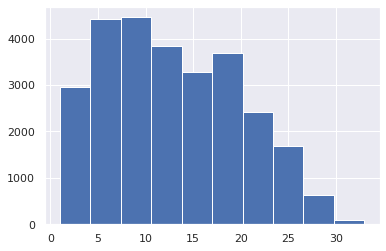

In [172]:
lens = []
for text in train_df[.text:
    if type(text) != str:
        continue
    lens.append(len(text.split()))
plt.hist(lens)

## Selected Text Len Dists.

33

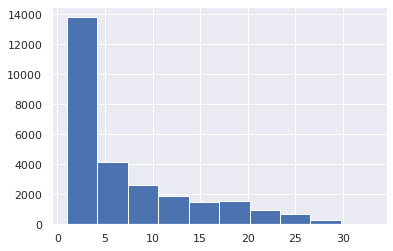

In [176]:
s_lens = []
for text in train_df.selected_text:
    if type(text) != str:
        continue
    s_lens.append(len(text.split()))
plt.hist(s_lens)
max(s_lens)

In [187]:
df = pd.read_csv('aug-output42.csv')
df = df.drop(columns=['date', 'query', 'user', 'original_text', 'contains_mention'])
df = df.drop_duplicates(['text'], keep='first').reset_index(drop=True)

## 길이 분포를 맞춰주기 위한 처리
- 33개 이상인 경우 제외

In [182]:
df['len_words'] = df.apply(lambda row: len(row.text.split()) <= 33, axis=1)

In [185]:
df = df[df.len_words == True]

(array([ 69918., 130139., 129728., 111162.,  90700.,  95487.,  60561.,
         48726.,  21379.,   3653.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <a list of 10 Patch objects>)

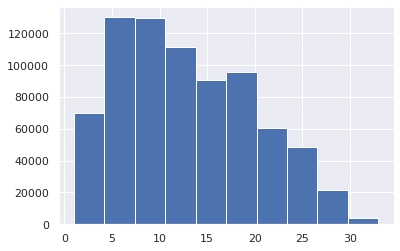

In [184]:
lens = []
for text in df.text:
    lens.append(len(text.split()))
plt.hist(lens)

예를들면 positive라고 분류한경우 0.97 이상일때만 선택
neg는 0.938 이상일 때 선택
neu는 0.91 이상일때 선택

## Sample Data 

In [215]:
textID = []
text = []
selected_text = []
sentiment = []

# 긍정 데이터

In [216]:
pos_df = df[df.pred_pos > 0.97]
pos_df

,polarity,id,text,sentiment,pred_sentiment,pred_pos,pred_neg,pred_neu
70,0,1467844097,Going to sleep. Hoping tomorrow is a better day.,negative,positive,0.970582,0.006714,0.022705
248,0,1467931983,This is the best leather sofa in the world! I...,negative,positive,0.971224,0.006827,0.021949
295,0,1467951238,fuck omg austins always there though man &lt;...,negative,positive,0.970186,0.007101,0.022713
440,0,1468017259,aaaaand back to my literature review At least...,negative,positive,0.970152,0.006658,0.023190
464,0,1468030831,good morning everybody! pkoi y fais pas beau ...,negative,positive,0.970626,0.006981,0.022393
...,...,...,...,...,...,...,...,...
761499,4,2193575236,my cluster is back and I'm a happy man,positive,positive,0.970664,0.007519,0.021817
761506,4,2193575912,I just switched back to Opera (using the moi s...,positive,positive,0.970503,0.006891,0.022606
761519,4,2193577391,OMG how good is ben and jerrys cookie dough ic...,positive,positive,0.970432,0.006862,0.022706
761520,4,2193577517,oooo haha just waking up and ready to eat a de...,positive,positive,0.970896,0.006730,0.022374


## 감정 스코어로 거르기 (긍정)

In [217]:
scores = []
for idx in pos_df.index:
    row = pos_df.loc[idx]
    score = get_sent(row.text)
    if score > 0.75:
        _text = html.unescape(row.text)
        textID.append(row.id)
        text.append(_text)
        selected_text.append(_text)
        sentiment.append('positive')
        scores.append(score)
len(scores)

11809

# 부정 데이터

In [218]:
neg_df = df[df.pred_neg > 0.938]
neg_df

,polarity,id,text,sentiment,pred_sentiment,pred_pos,pred_neg,pred_neu
0,0,1467810672,is upset that he can't update his Facebook by ...,negative,negative,0.010985,0.941682,0.047333
1,0,1467811184,my whole body feels itchy and like its on fire,negative,negative,0.011899,0.940294,0.047807
4,0,1467812964,Hollis' death scene will hurt me severely to w...,negative,negative,0.010454,0.941794,0.047751
9,0,1467814438,I hate when I have to call and wake people up,negative,negative,0.011467,0.941426,0.047106
12,0,1467815753,Meh... Almost Lover is the exception... this t...,negative,negative,0.010011,0.942419,0.047570
...,...,...,...,...,...,...,...,...
761338,4,2193453641,just watched twilight...it was horrible...now ...,positive,negative,0.010715,0.942048,0.047237
761395,4,2193502127,tired... it's raining outside my window *sigh*,positive,negative,0.011658,0.939737,0.048606
761436,4,2193526951,#digitalbritain on page 11 and bored already.....,positive,negative,0.008426,0.939063,0.052511
761508,4,2193575988,Bloody knackered! And still got two hours to g...,positive,negative,0.010050,0.940772,0.049178


## 감정 스코어로 거르기 (부정)

In [219]:
scores = []
for idx, _ in enumerate(neg_df.text):
    row = neg_df.iloc[idx]
    score = get_sent(row.text)
    if score < -0.72:
        _text = html.unescape(row.text)
        textID.append(row.id)
        text.append(_text)
        selected_text.append(_text)
        sentiment.append('negative')
        scores.append(score)
len(scores)

12236

## 뉴트럴 데이터

In [220]:
neu_df = df[df.pred_neu > 0.91]
neu_df

,polarity,id,text,sentiment,pred_sentiment,pred_pos,pred_neg,pred_neu
5,0,1467813137,about to file taxes,negative,neutral,0.026866,0.029800,0.943334
8,0,1467814192,blagh class at 8 tomorrow,negative,neutral,0.033804,0.027409,0.938787
20,0,1467819712,Just checked my user timeline on my blackberry...,negative,neutral,0.029914,0.041417,0.928670
27,0,1467822918,just leaving the parking lot of work!,negative,neutral,0.021843,0.046810,0.931347
35,0,1467826052,Why won't you show my location?! http://twit...,negative,neutral,0.022640,0.042167,0.935194
...,...,...,...,...,...,...,...,...
761518,4,2193577328,finding out what this is.,positive,neutral,0.041587,0.024415,0.933999
761521,4,2193577592,any ideaZ on what to get dad for father's day ...,positive,neutral,0.024859,0.040425,0.934716
761525,4,2193578138,checking my mail,positive,neutral,0.026137,0.029986,0.943877
761528,4,2193578576,In the garden,positive,neutral,0.034174,0.025917,0.939909


In [221]:
neu_df = neu_df.sample(n=20000, random_state=42)

In [222]:
scores = []
for idx, _ in enumerate(neu_df.text):
    row = neu_df.iloc[idx]
    score = get_sent(row.text)
    if -0.05 < score < 0.05:
        _text = html.unescape(row.text)
        scores.append(score)
        textID.append(row.id)
        text.append(_text)
        selected_text.append(_text)
        sentiment.append('neutral')
len(scores)

15446

## 길이 분포가 살짝 다르다 ㅠㅠ

(array([6058., 9554., 8592., 7403., 3189., 2103., 1676.,  695.,  189.,
          32.]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <a list of 10 Patch objects>)

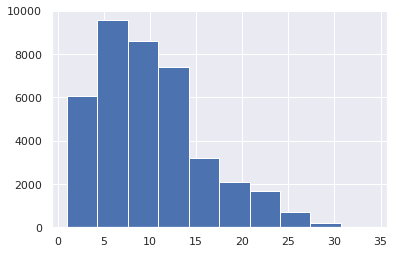

In [223]:
lens = []
for t in text:
    lens.append(len(t.split()))
plt.hist(lens)

# df 로 만들기

In [224]:
aug_df = pd.DataFrame.from_dict({
    'textID': textID,
    'text': text,
    'selected_text': selected_text,
    'sentiment': sentiment,
})

In [225]:
aug_df.sentiment.value_counts()

neutral     15446
negative    12236
positive    11809
Name: sentiment, dtype: int64

In [227]:
aug_df = aug_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [228]:
aug_df

,textID,text,selected_text,sentiment
0,2049164206,Successfully tld dude tht I appreciate his hel...,Successfully tld dude tht I appreciate his hel...,positive
1,2060280508,just got home from work and going to lay down....,just got home from work and going to lay down....,negative
2,2192957746,good morning pumpkins!! have a PROSPEROUS day!!!,good morning pumpkins!! have a PROSPEROUS day!!!,positive
3,1754078454,I hate dropping peeps off at the airport,I hate dropping peeps off at the airport,negative
4,2051208876,What's everyone doing 2moro? I'm going yardsal...,What's everyone doing 2moro? I'm going yardsal...,neutral
...,...,...,...,...
39486,1977656277,Is veryveryvery happy!,Is veryveryvery happy!,positive
39487,2185356423,says aga ko ngcng. it's a miracle! (LOL) GOOD ...,says aga ko ngcng. it's a miracle! (LOL) GOOD ...,positive
39488,2067519687,Got to go and fill in some form things for col...,Got to go and fill in some form things for col...,neutral
39489,2253655462,It would be ridiculously wonderful if the sun ...,It would be ridiculously wonderful if the sun ...,positive


In [230]:
aug_df.to_csv('./dataset/sent140.csv', index=False)
aug_df.to_csv('/home/jeinsong/senti_ext/dataset/sent140.csv', index=False)